# Data Analysis of Indiana DCS dataset 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import show

In [144]:
df = pd.read_csv("IndianaDCS.csv")

In [130]:
df.shape

(402070, 12)

In [132]:
df.describe()

,REF_ID,SUBSTANTIATED,AGE
count,4.020700e+05,402070.000000,402070.000000
mean,1.074053e+09,0.134509,6.854249
std,6.200160e+08,0.341199,5.471858
min,8.637000e+03,0.000000,0.000000
25%,5.373301e+08,0.000000,1.000000
50%,1.074143e+09,0.000000,7.000000
75%,1.611062e+09,0.000000,12.000000
max,2.147483e+09,1.000000,49.000000


In [133]:
df.head()

,REF_ID,REPORT_DATE_RAW,DATETIME,COUNTY,DECISION,RESPONSE_TIME,ASM_MALTREATMENT,ASSESSMENT_DECISION,SUBSTANTIATED,PARTICIPANT,AGE,AGE_BINS
0,1406424407,1/1/19 0:32,0019-01-01 00:32:00.000,Kosciusko,Screen In,5 days,neglect,withdrawn,0,Victim,11,9-12
1,490485216,1/1/19 7:16,0019-01-01 07:16:00.000,Lake,Screen In,24 hours,Physical Abuse,accepted,1,Victim,0,0-3
2,1773822066,1/1/19 11:34,0019-01-01 11:34:00.000,Marion,Screen In,24 hours,neglect,accepted,0,Victim,9,9-12
3,9124632,1/1/19 13:22,0019-01-01 13:22:00.000,Lake,Screen In,24 hours,neglect,accepted,0,Victim,5,4-8
4,2067805478,1/1/19 18:41,0019-01-01 18:41:00.000,Ripley,Screen In,24 hours,Physical Abuse,accepted,0,Victim,4,4-8


In [4]:
# Check for Null/Missing values
df.isnull().sum()

REF_ID                     0
REPORT_DATE_RAW            0
DATETIME                   0
COUNTY                     0
DECISION                   0
RESPONSE_TIME              0
ASM_MALTREATMENT       19233
ASSESSMENT_DECISION        0
SUBSTANTIATED              0
PARTICIPANT                0
AGE                        0
dtype: int64

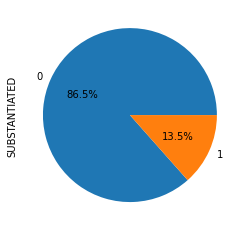

In [27]:
df.SUBSTANTIATED.value_counts().plot.pie(autopct="%.1f%%")

Only 13.5 % of the cases reported are Substantiated.

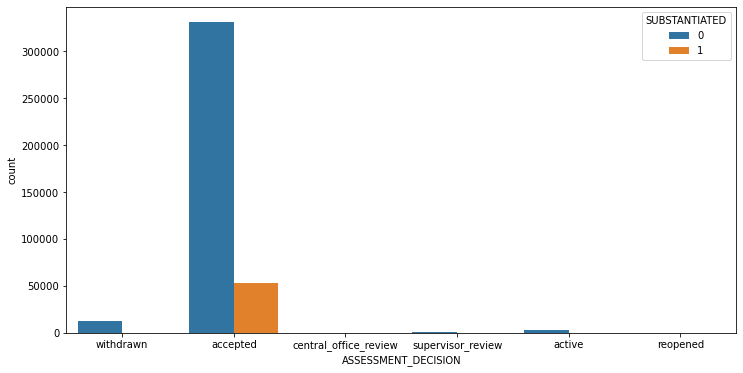

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='ASSESSMENT_DECISION', hue= 'SUBSTANTIATED', data=df)

Of all the Screen in applications,'accepted' is the highest ASSESSMENT_DECISION, followed by withdrawn and active.

In [134]:
# combining the Assessment_decision with negligible values to 'Other'
df['ASSESSMENT_DECISION'] = df['ASSESSMENT_DECISION'].replace(dict.fromkeys(['active','supervisor_review',
                                                                             'central_office_review','reopened'], 'Other'))


In [31]:
df.ASSESSMENT_DECISION.value_counts(normalize=True)

accepted     0.955513
withdrawn    0.031604
Other        0.012883
Name: ASSESSMENT_DECISION, dtype: float64

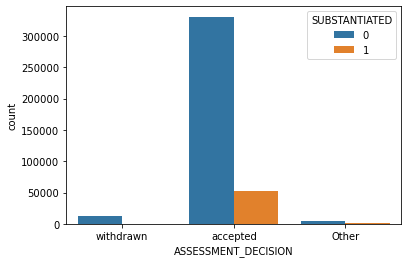

In [34]:

sns.countplot(x='ASSESSMENT_DECISION', hue= 'SUBSTANTIATED', data=df)

In [35]:
#Check unique values for Response_time
df.RESPONSE_TIME.value_counts(normalize=True)

24 hours    0.579939
5 days      0.310717
2 hours     0.075810
1 hour      0.033534
Name: RESPONSE_TIME, dtype: float64

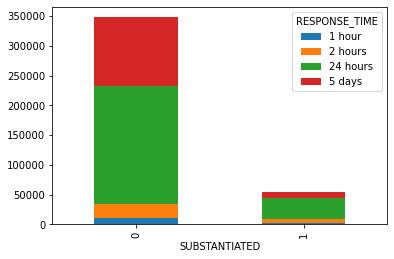

In [62]:
df_plot = df.groupby(['RESPONSE_TIME','SUBSTANTIATED']).size().reset_index().pivot(columns='RESPONSE_TIME', 
                                                                                   index='SUBSTANTIATED', values=0)
df_plot.plot(kind='bar', stacked=True)

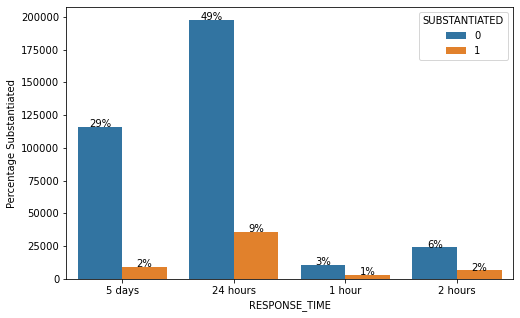

In [141]:
#sns.countplot(x='RESPONSE_TIME',data=df,hue='SUBSTANTIATED')
plt.figure(figsize=(8,5))
#sns.set(style="darkgrid")
total = float(len(df))  
ax = sns.countplot(x='RESPONSE_TIME', hue= 'SUBSTANTIATED', data=df) 
ax.set_xlabel("RESPONSE_TIME")
ax.set_ylabel("Percentage Substantiated")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format(height * 100/total),
            ha="center") 
show()

Approximately 49% of the Screened in cases had 24 hour response time and 29% of the cases had 5 days response time. Only 3% of the Screened in cases had 1 hour response time and 6% of the cases had 2 hour response time. Approximately 9 % of the overall cases reported are classified as life threatening.

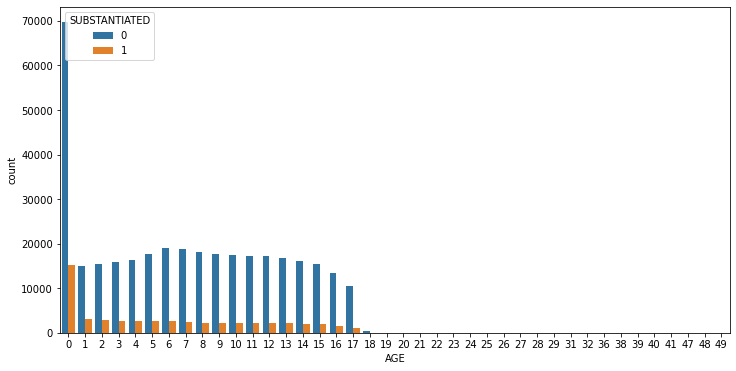

In [136]:
plt.figure(figsize=(12,6))
sns.countplot(x='AGE',data=df,hue='SUBSTANTIATED')

Highest # of cases reported are for the age 0. Age distribution ranges from 0 to 49. 

In [52]:
# Combining the age in bins
df['AGE_BINS'] = pd.cut(x=df['AGE'], bins=[-np.inf, 3, 8, 12, 18, 25, 49],
                        labels=['0-3', '4-8', '9-12', '13-18', '19-25', 'Other'])
df[['AGE', 'AGE_BINS']].head()

,AGE,AGE_BINS
0,11,9-12
1,0,0-3
2,9,9-12
3,5,4-8
4,4,4-8


In [53]:
df['AGE_BINS'].value_counts(normalize=True)

0-3      0.347972
4-8      0.254762
13-18    0.202798
9-12     0.194327
Other    0.000087
19-25    0.000055
Name: AGE_BINS, dtype: float64

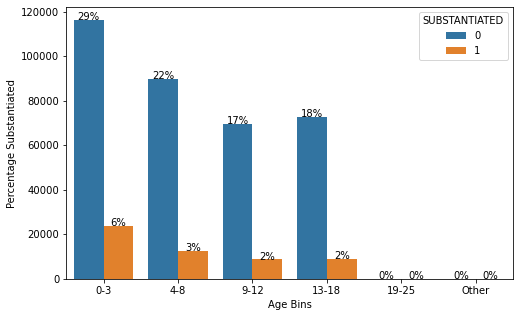

In [140]:
plt.figure(figsize=(8,5))
#sns.set(style="darkgrid")
total = float(len(df))  
ax = sns.countplot(x='AGE_BINS', hue= 'SUBSTANTIATED', data=df) 
ax.set_xlabel("Age Bins")
ax.set_ylabel("Percentage Substantiated")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}%'.format(height * 100/total),
            ha="center") 
show()

29% of the cases reported are for children of age group 0-3, followed by 4-8 group at 22% and 13-18 at 18%.

In [55]:
df_county = df.groupby(['COUNTY'],as_index=False)['REF_ID'].count()
df_county_sorted = df_county.sort_values('REF_ID',ascending=False)
df_county_sorted.head(10)

,COUNTY,REF_ID
49,Marion,66294
1,Allen,21774
45,Lake,19482
71,Saint Joseph,18529
82,Vanderburgh,11779
19,Elkhart,11625
79,Tippecanoe,11480
84,Vigo,11258
48,Madison,10003
17,Delaware,8807


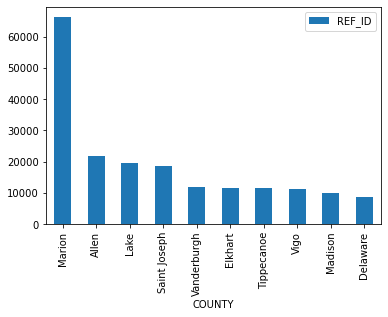

In [147]:
# Top 10 Counties by # of cases
df_county_sorted.head(10).plot(kind='bar',x='COUNTY')


Marion county reported the highest number of cases, followed by Allen and Lake. See above for the top 10 counties contributing to the total cases.

In [145]:
df.ASM_MALTREATMENT.value_counts()

neglect                                                         255023
neglect,physical abuse                                           60363
physical abuse                                                   20919
sexual abuse                                                     18684
neglect,sexual abuse                                             17091
neglect,physical abuse,sexual abuse                               7951
physical abuse,sexual abuse                                       1700
human/sexual trafficking,neglect,sexual abuse                      456
human/sexual trafficking,sexual abuse                              246
human/sexual trafficking,neglect,physical abuse,sexual abuse       241
human/sexual trafficking,neglect                                    81
human/sexual trafficking                                            34
human/sexual trafficking,physical abuse,sexual abuse                25
human/sexual trafficking,neglect,physical abuse                     18
human/

Combining the ASM_MALTREATMENT to broader categories for analysis purposes.

In [58]:
df['ASM_MALTREATMENT'] = df['ASM_MALTREATMENT'].replace(dict.fromkeys(['neglect,physical abuse,sexual abuse',
                                                                       'physical abuse,sexual abuse'],'Physical/Sexual Abuse'))

In [59]:
df['ASM_MALTREATMENT'] = df['ASM_MALTREATMENT'].replace(dict.fromkeys(['neglect,physical abuse',
                                                                       'physical abuse'],'Physical Abuse'))

In [21]:
df['ASM_MALTREATMENT'] = df['ASM_MALTREATMENT'].replace(dict.fromkeys(['neglect,sexual abuse',
                                                                       'sexual abuse'],'Sexual Abuse'))

In [60]:
df['ASM_MALTREATMENT'] = df['ASM_MALTREATMENT'].replace(dict.fromkeys(['human/sexual trafficking,neglect,sexual abuse',
                                                                       'human/sexual trafficking,sexual abuse',
                                                                       'human/sexual trafficking,neglect,physical abuse,sexual abuse',
                                                                       'human/sexual trafficking,neglect',
                                                                       'human/sexual trafficking',
                                                                       'human/sexual trafficking,physical abuse,sexual abuse',
                                                                       'human/sexual trafficking,neglect,physical abuse',
                                                                       'human/sexual trafficking,physical abuse'],'Human Trafficking'))

In [57]:
df['ASM_MALTREATMENT'].value_counts(normalize=True)

neglect                  0.666140
Physical Abuse           0.212315
Sexual Abuse             0.093447
Physical/Sexual Abuse    0.025209
Human Trafficking        0.002889
Name: ASM_MALTREATMENT, dtype: float64

<Figure size 1440x720 with 0 Axes>

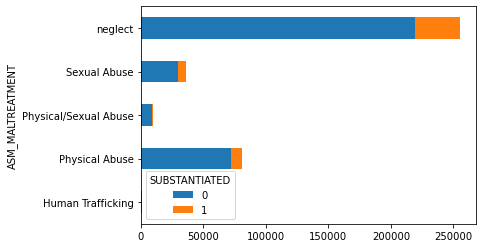

In [72]:
plt.figure(figsize=(20,10))
df.groupby(['ASM_MALTREATMENT','SUBSTANTIATED']).size().unstack().plot(kind='barh',stacked=True)

Neglect constitues approximately 67% of the cases reported.21% of the cases fall into Physical abuse and 9% are Sexual abuse cases.Cases with Physical/Sexual abuse and human Trafficking form less than 1% of the total population.

In [79]:
# Returning Cases
returning_cases = df.groupby('REF_ID')['REF_ID'].count()
returning_cases = returning_cases.rename('Count').reset_index()
returning_cases = returning_cases[returning_cases.Count > 1]
print(returning_cases.size)
returning_cases.sort_values('Count',ascending=False)

167682


,REF_ID,Count
118221,1177646816,32
11859,119600451,31
132817,1322048963,31
86268,859782401,30
162267,1617524825,29
...,...,...
94847,945466587,2
94857,945597766,2
94863,945626246,2
94867,945660484,2


In [87]:
# Unique cases by county
cases_by_county = df.groupby(['REF_ID','COUNTY'])['REF_ID'].count()
cases_by_county = cases_by_county.rename('Count').reset_index()
cases_by_county_sorted = cases_by_county.sort_values('Count',ascending=False)
cases_by_county_sorted.head(20) 


,REF_ID,COUNTY,Count
92051,859782401,Saint Joseph,30
173093,1617524825,Floyd,29
178734,1671395618,Marion,28
141717,1322048963,Tippecanoe,26
111116,1036983025,Marion,26
158788,1483945848,Vigo,26
43959,411964690,Boone,26
21837,205050779,Allen,25
110142,1028344350,Bartholomew,24
138444,1291265257,Bartholomew,24


In [106]:
df_substantiated= df.groupby(['COUNTY','SUBSTANTIATED'],as_index=False)['REF_ID'].count()
#df_substantiated = pd.DataFrame(df_substantiated)
df_substantiated

,COUNTY,SUBSTANTIATED,REF_ID
0,Adams,0,1265
1,Adams,1,342
2,Allen,0,19449
3,Allen,1,2325
4,Bartholomew,0,5115
...,...,...,...
181,Wells,1,164
182,White,0,1461
183,White,1,213
184,Whitley,0,1389
